# Chapter 8: Cryo-Electron Microscopy

Excursion: Single Particle Reconstruction in Cryo-Electron Microscopy

# Problem 8.1 - 1D, Alignment via Correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 84.5, 84.5, -0.5)

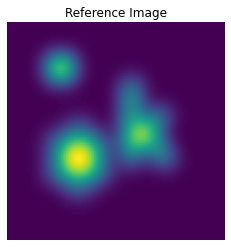

In [2]:
# Bringing the Reference Image data into the program using plt.imread and reshaping data to plot using plt.imshow
ref_im = plt.imread('test2Dblur.tif')
ref_im.shape
ref_im.dtype
ref_im[:10,:10]

# Plotting the reference image being used
plt.figure('Reference Image')
plt.title('Reference Image')
plt.imshow(ref_im)
plt.axis('off')

In [3]:
# Loading the 1dImages.npz file containing the variables shown below:
file = np.load('1dImages.npz')
file.files

# 1dImages.npz: contains variables:
#  noiselevels = array containing 1/sqrt(SNR) for each of 3 simulated datasets
#  shiftSD = how many pixels to jitter the fake data
#  samples = 3D array containing simulated images
#	 samples[i,j,k] where i=which image, j = position in image, k = which noiselevel

['samples', 'noiselevels', 'shiftSD']

In [123]:
# Splitting the .npz file, I was able to pull out the following variables:
samples = file['samples']
print("Samples = {} \n".format(samples))

noise = file['noiselevels']
print('Noise Levels = {} \n'.format(noise))

sigma = file['shiftSD']
print('ShiftSD = {}'.format(sigma))

Samples = [[[-0.34891339 -0.1744567  -0.04361418]
  [ 1.23325128  0.61662566  0.15415645]
  [-3.9701316  -1.98506588 -0.49626659]
  ...
  [-1.44030302 -0.72015155 -0.18003794]
  [-2.17315362 -1.0865768  -0.27164418]
  [ 0.6120713   0.30603565  0.07650891]]

 [[ 0.30164451  0.02627636 -0.18024976]
  [-1.39606299 -0.66465952 -0.11610692]
  [-1.00119849 -0.50954124 -0.1407983 ]
  ...
  [-0.44178586 -0.22089293 -0.05522323]
  [-0.4198908  -0.2099454  -0.05248635]
  [ 3.64324674  1.82162337  0.45540584]]

 [[ 1.04237307  1.55845213  1.94551143]
  [ 3.56336813  3.13312725  2.81044659]
  [ 0.34124124  1.45237727  2.2857293 ]
  ...
  [-3.36869882 -1.68434941 -0.42108735]
  [ 0.17679862  0.08839931  0.02209983]
  [-0.75173389 -0.37586694 -0.09396674]]

 ...

 [[ 2.48715621  1.24376507  0.31122171]
  [-0.43520711 -0.21830131 -0.05562195]
  [ 0.04489534  0.02505171  0.01016899]
  ...
  [ 2.70927792  1.35463896  0.33865974]
  [-0.19784718 -0.09892359 -0.0247309 ]
  [ 0.58714063  0.29357031  0.0733

In [5]:
#------------------------------------------------------------------------------------------------------
# The Following code was used during my initial investigation into the dataset, this may be inaccurate.
#------------------------------------------------------------------------------------------------------

# Splicing the 'samples' variable array into their i,j,k sub-variables when,
#   {samples[i,j,k] where i=which image, j = position in image, k = which noiselevel}
i = samples[:,0] # Which Image 
j = samples[:,1] # Position in Image
k = samples[:,2] # Which Noise Level
#print('Which Image = \n',i, '\n\n')
#print('Position in Image = \n',j, '\n\n')
#print('Which Noise Level = \n',k, '\n\n')

# Pulling out the data set for each noise level
# Which Image
lsample_i = i[:,0] # large noise sample size = 2
msample_i = i[:,1] # Medium noise sample size = 1
ssample_i = i[:,2] # Small noise sample size = 0.25
#print('Which Image: \n',ssample_i,'\n\n',msample_i,'\n\n', lsample_i,'\n\n')

# Position of Image
lsample_j = j[:,0]
msample_j = j[:,1]
ssample_j = j[:,2]
#print('Position in Image: \n',ssample_j,'\n\n',msample_j,'\n\n', lsample_j,'\n\n')

# Which Noise Level
lsample_k = k[:,0]
msample_k = k[:,1]
ssample_k = k[:,2]
#print('Which Noise Level: \n',ssample_k,'\n\n',msample_k,'\n\n', lsample_k,'\n\n')

# For the lowest noise level, find the naive average of each pixel over samples and call it "Template"
min_noise = np.min(noise)
#print(min_noise)

N = np.size(ssample_i)
n = np.arange(1,N+1)
n_ave = ssample_i.cumsum()/n
#print(n)

# Ploting what I believe is the naive average over the size of the array
#plt.figure()
#plt.plot(n,n_ave, 'b-');
#plt.plot(np.cumsum(np.ones(np.size(i[:,2]))), i[:,2], 'b.');

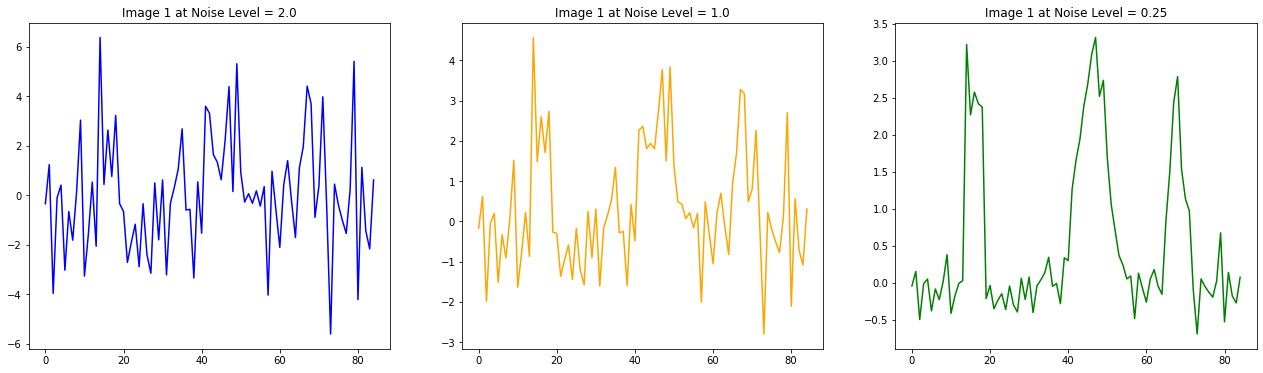

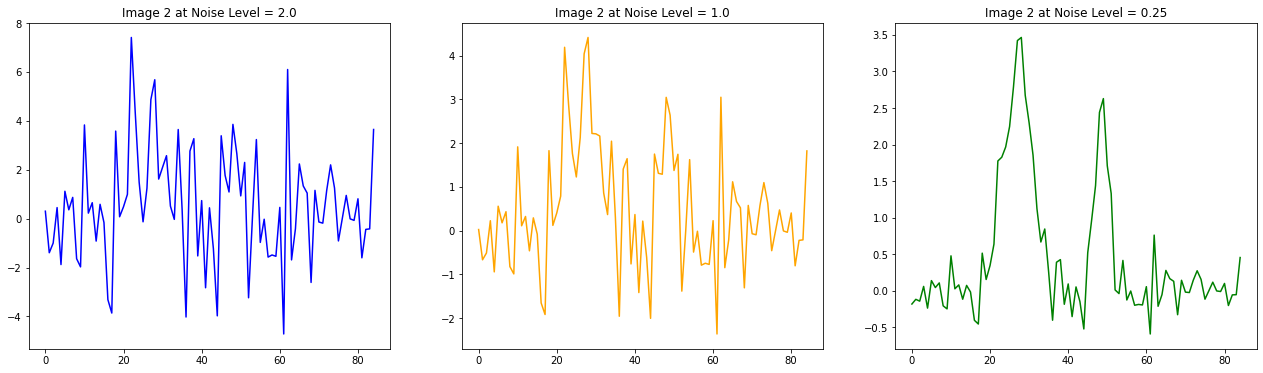

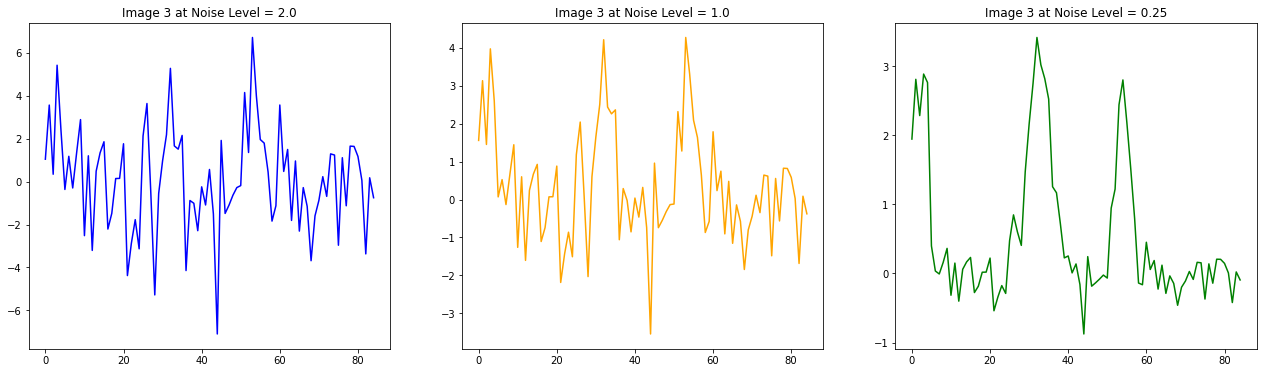

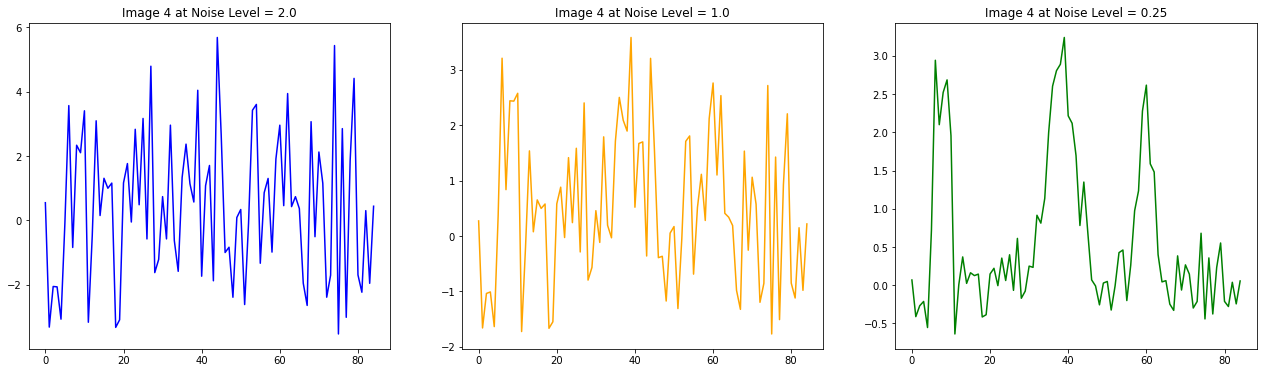

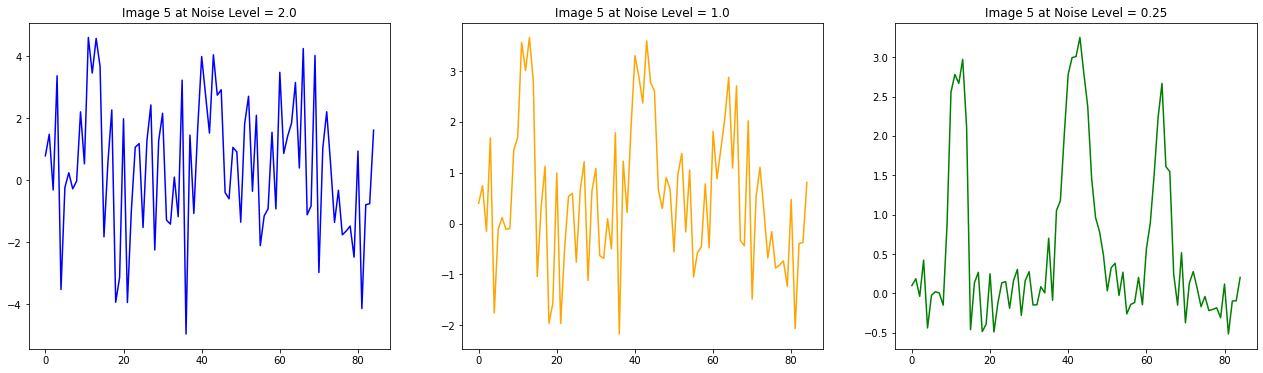

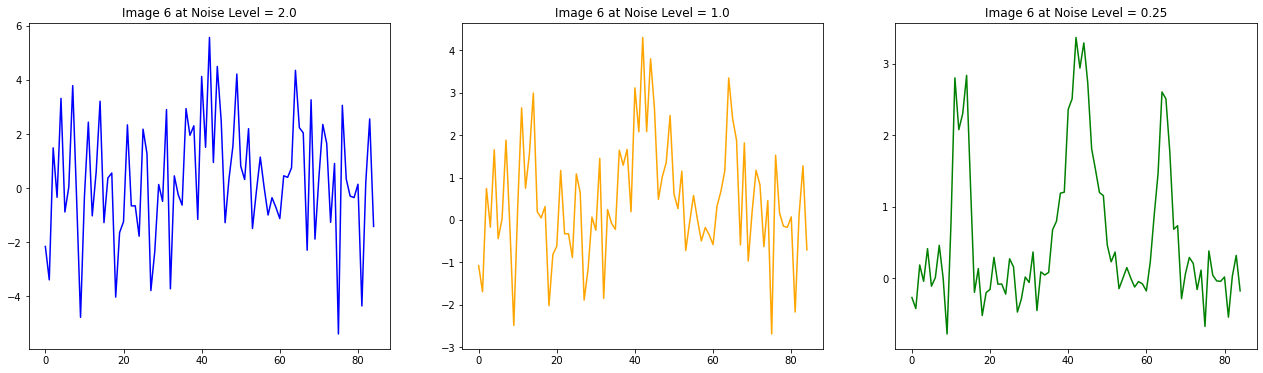

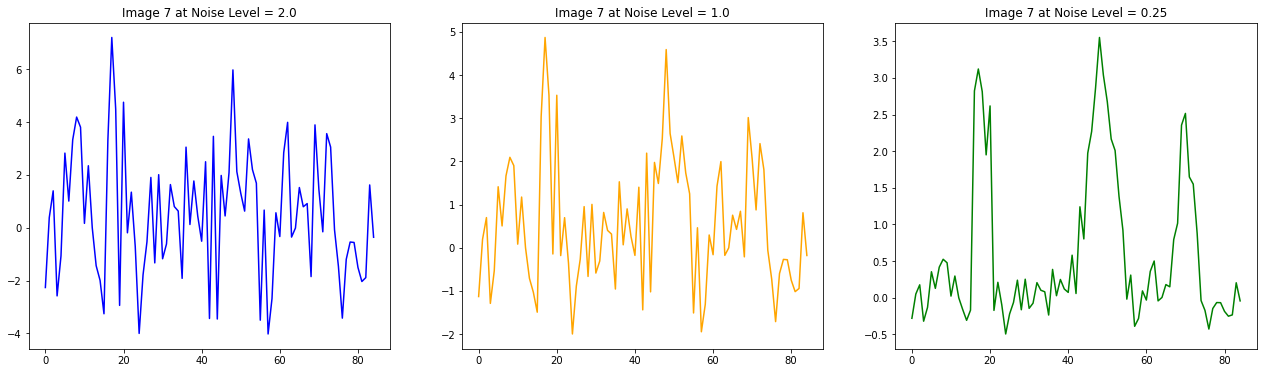

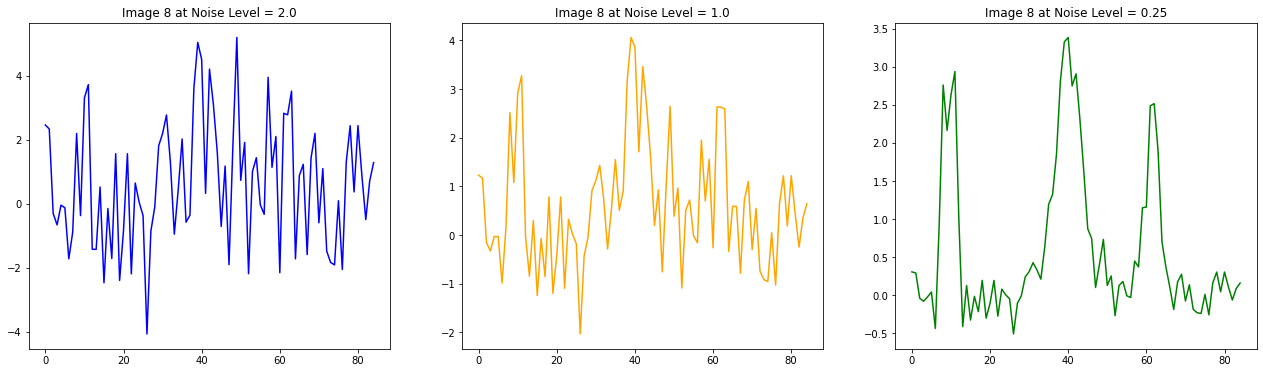

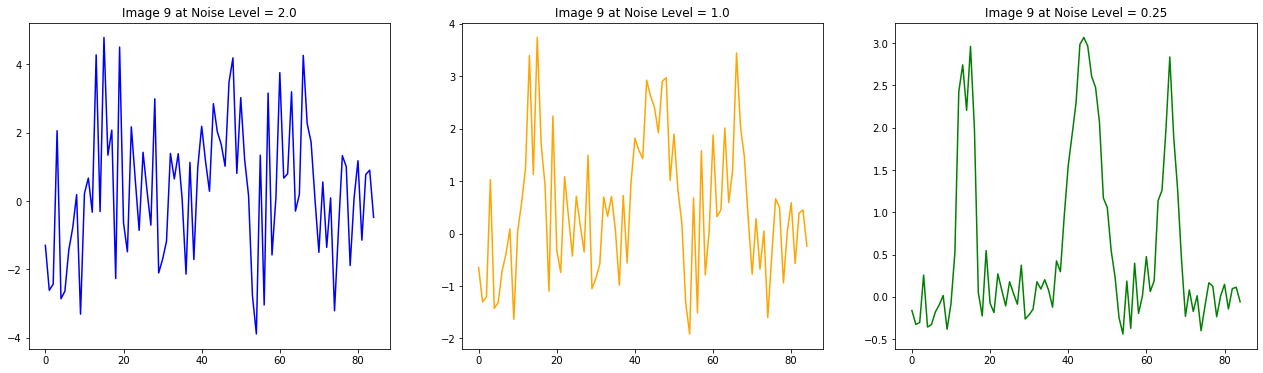

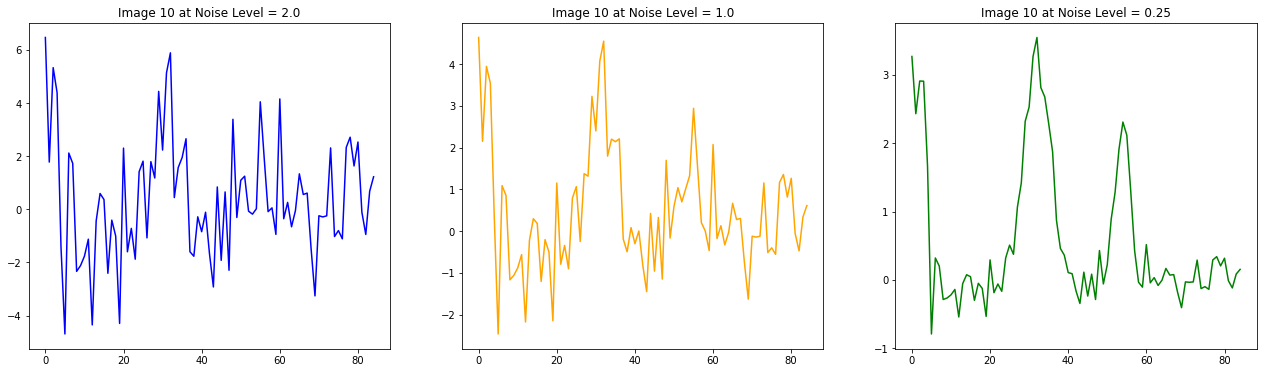

In [7]:
# After recieving help from Dr. Kinder
# Displaying the 3 images at each respective noise level that exist in the variable array 'samples'
n = 10
for x in range(n):
    plt.figure('Image {}'.format(x+1), figsize=(22,6))
    for i in range(1):
        plt.subplot(1,3,1)
        plt.plot(samples[x,:,0], color='blue')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[0]))
        plt.subplot(1,3,2)
        plt.plot(samples[x,:,1], color='orange')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[1]))
        plt.subplot(1,3,3)
        plt.plot(samples[x,:,2], color='green')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[2]))
              

In [ ]:
# Therefore, analysing the first image
larges1 = samples[0,:,0] # Analysing the first image, first noise level (=2)
meds1 = samples[0,:,1]   # Analysing the first image, second noise level (=1)
smalls1 = samples[0,:,2] # Analysing the first image, third noise level (=0.25)

# Therefore, analysing the second image
larges2 = samples[1,:,0]
meds2 = samples[1,:,1]
smalls2 = samples[1,:,2]

# Therefore, analysing the third image
larges3 = samples[2,:,0]
meds3 = samples[2,:,1]
smalls3 = samples[2,:,2]

# This may be repeated until 1500 iterations have taken place (samples[1499, :, (0,1, or 2)]

[0.         0.00902961 0.23883944 0.1870363  0.14612852 0.21727527
 0.09382414 0.18920119 0.10964296 0.39136835 0.33561098 2.23556551
 2.94501467 2.50378629 2.67541494 2.10444644 0.60918668 0.05365071
 0.06521591 0.21902043 0.16072092 0.02589223 0.02431927 0.03938641
 0.06418035 0.26961232 0.18503866 0.14781726 0.27952389 0.20876635
 0.06620297 0.08304315 0.12165682 0.2425808  0.21759563 0.09698296
 0.2584164  0.48475543 0.76752882 1.16872847 1.63582718 2.42177546
 2.96410779 2.98353983 3.30110721 3.16598249 2.56500757 2.01082827
 1.4891807  1.10147739 0.87270447 0.48503033 0.13880932 0.10444803
 0.08755175 0.10926017 0.00491715 0.25744146 0.07556803 0.05005003
 0.30893454 0.3420949  0.28040432 1.18886646 2.16293679 2.64443646
 2.02897666 1.05221756 0.49143812 0.3127924  0.07152337 0.03854977
 0.0134459  0.15302718 0.07368032 0.14449349 0.03400657 0.02032209
 0.11796649 0.28147374 0.22246185 0.18110621 0.20349185 0.2430149
 0.02171029]


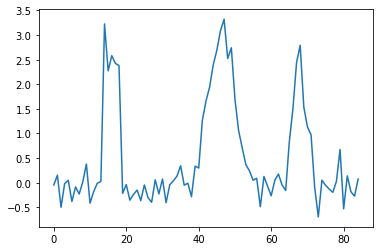

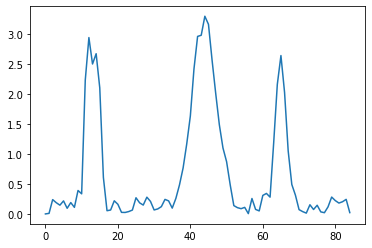

In [144]:
# For the lowest noise level, find the naive average of each pixel over samples
# (first column, bottom row of Figure 8.5 on Page 211 of the textbook)
plt.figure()
plt.plot(samples[0,:,2])
dx = np.linspace(0,85,85)
for N in range(1499):
    for i in range(84):
        dx[i+1] = (np.abs((samples[N,i+1,2]+samples[N,i,2])/2))
print(dx)
plt.figure()
plt.plot(dx)

In [ ]:
# Find the cross-correlations of this template above with each sample and display the first few
# Third column, bottom row of Figure 8.5 on p.211
